Importa os modulos necessários para execução do script. Como de costume, utilizamos apenas o numpy para cálculos e matplotlib para visualização.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

A célula abaixo define as funções necessárias para a execução da simulação do diagrama de olho. Três são as funções principais utilizadas: sigPart(), getMask() e getSignal().

In [2]:
def sigPart(xt, T, N, partInd):
    sigStart = 2*T*N  # ignore some transient effects at the beginning of the signal
    samples_perT = N*T
    samples_perWindow = 2*T*N+1

    sig_part = xt[sigStart + samples_perT*partInd + np.arange(samples_perWindow)]
    t_emphasize = np.linspace(2*T+T*partInd, 2*T+T*partInd+2*T, 2*T*N+1) + t.min()
    
    return t_emphasize, sig_part
    
def getMask(name, T, rollOff=None):
    def rc(t, beta):
        return np.sinc(t)*np.cos(np.pi*beta*t)/(1-(2*beta*t)**2)
    def rrc(t, beta):
        return ( np.sin( np.pi*t*(1-beta) ) + 4*beta*t*np.cos(np.pi*t* (1+beta) ) ) / ( np.pi*t*( 1-( 4*beta*t )**2 ) )
    
    if name == 'rc':
        return lambda t: rc(t/T, rollOff)
    elif name == 'rrc':
        return lambda t: rrc(t/T, rollOff)

def setSignal(g, d, T, N):
    # t = np.linspace(-T, (len(d)+2)*T, N)
    t = np.arange(-2*T, (len(d)+2)*T, 1/N)
    g0 = g(np.array([1e-8]))
    xt = sum(d[k]*g(t-k*T) for k in range(len(d)))
    return t, xt/g0

Visualização das máscaras aplicadas nos símbolos associados. As variáveis 

(21,)


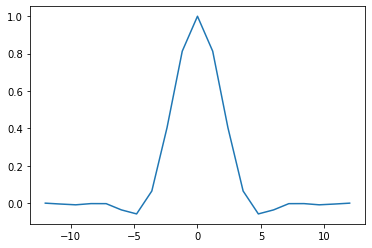

In [3]:
T = 4
N = 20
rollOff = 0.8
mask = 'rc'

p = 8

t = np.linspace(-(T+p), T+p, N+1)
plt.plot(t,getMask(mask, T, rollOff=rollOff)(t))
print(np.shape(t))

Aqui começa a simulação. a variável *sigSize* define o tamanho total do sinal análisado (quantidade de símbolos) para obtenção do diagrama de olho.

**Sugestão**: Iniciar com um quantidade baixa de símbolos para compreensão da simulação, e depois aumentar o número e ver o comportamento do diagrama de olho.

In [4]:
# quantidade de simbolos
sigSize = 100

# cria a variável de dados aleatóriamente (randn) e utiliza a função
# sign para atribuir valores positivos ou negativos à partir de um 
# valor. Dica: help(np.sign) 
data = np.sign(np.random.randn(sigSize))

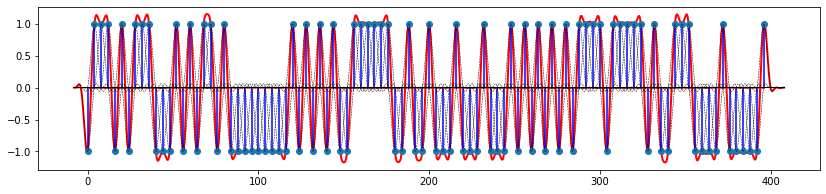

In [5]:
# Cria a mascara para se utilizada, nessa simulação utilizamos dois
# tipos de filtro: Raisec Cosine Filter (RC) e Root Raised Cosine 
# Filter (RRC)
mask = getMask('rc', T=T, rollOff=rollOff)

# Adiciona a máscara ao sinal gerado (data)
t, xt = setSignal(mask, data, T=T, N=N)

fig = plt.figure(figsize=(14,3))
plt.plot(t, xt, 'r-', lw=2)
plt.stem(T*np.arange(len(data)), data, 'b')
for k in range(len(data)):
        plt.plot(t, data[k]*mask(t-k*T), 'k--', lw=0.5)

In [7]:
from ipywidgets import interact#, interactive, fixed, interact_manual
import ipywidgets as widgets

global persistence, eyeParts, eyePartsAlphas

persistence = int(0.2*sigSize)
eyeParts = np.zeros((2*T*N+1, persistence))
eyePartsAlphas = np.linspace(0.5, 1, persistence)

def plot_func(part):
    fig, ax = plt.subplots(figsize=(10, 6))

    plt.subplot(211)
    plt.plot(t, xt, 'k-', lw=2)
    tt, xtt = sigPart(xt, T, N, part)
    plt.plot(tt, xtt, 'r-', lw=4)
    plt.xlim([0, t[-1]])

    plt.subplot(235)
    tt, xtt = sigPart(xt, T, N, part)
    t_part = np.linspace(-T, T, 2*T*N+1)
    eyeParts[:,:-1] = eyeParts[:,1:]
    eyeParts[:,-1] = xtt.T

# Gera o diagrama de olho a partir do sinal data + mascara
    rgba_colors = np.zeros((persistence,4))
    rgba_colors[:,0] = 0.0
    rgba_colors[:,1] = 0.0
    rgba_colors[:,2] = 1.0
    rgba_colors[:,3] = eyePartsAlphas
    for i in range(0,persistence):
        plt.plot(t_part, eyeParts[:,i], color=rgba_colors[i], lw=1)

    plt.show()

interact(plot_func,
        part = widgets.IntSlider(min=0, max=sigSize, step=1, value=50))

interactive(children=(IntSlider(value=50, description='part'), Output()), _dom_classes=('widget-interact',))

<function __main__.plot_func(part)>